# Case Study: Sentiment Analysis

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Today-lab" data-toc-modified-id="Today-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Today lab</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" rel="nofollow" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Undestand-the-dataset" data-toc-modified-id="Undestand-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Undestand the dataset</a></span></li></ul></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li><li><span><a href="#Our-previous-baseline" data-toc-modified-id="Our-previous-baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Our previous baseline</a></span></li><li><span><a href="#Build-an-MLP-Classifier" data-toc-modified-id="Build-an-MLP-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build an MLP Classifier</a></span></li></ul></div>

## Load dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import pylab as pl # package inheriting most of matplotlib package functions with shorter syntax 
import seaborn as sns

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\DavideF\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\DavideF\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\DavideF\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\DavideF\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\DavideF\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

True

### [About Train, validation and test sets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
![test/train/val](https://miro.medium.com/max/1466/1*aNPC1ifHN2WydKHyEZYENg.png)

* **Training Dataset:** The sample of data used to fit the model.
* **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
VAL = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/val.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


### Undestand the dataset

First, we need to preprocess our dataset. In this lab, we will only see simple preprocessing steps.

$$[TODO - Students]$$ 
Briefly explain the role of tokenization and what the vocabulary is. Fill the blanks (...) in the following cells

___
Goal of tokenization: preprocessing text (paragraph, sentence, word) in order to split it into usefull piece of data that can be analysed after. 
Paragraph may be split into a list of sentences
Sentence may be split into a list of words
Word may be split into a list of characters

The dictionary is a list of words and it is used to make some words recognition or can be use for example to make a word spelling corrector using the Levenshtein distance
___

In [3]:
# Tokenized the reviews
from nltk.tokenize import word_tokenize
# nltk.download('punkt') # If nltk requires to download 'punkt' depending on your installation

reviews_tokenized = [word_tokenize(review) for review in TRAIN["Reviews"]]
for sentence in reviews_tokenized[:10]: print('%s'%sentence)

['I', 'love', 'it', '!', '!', '!', 'I', 'absolutely', 'love', 'it', '!', '!', '👌👍']
['I', 'love', 'the', 'BLU', 'phones', '!', 'This', 'is', 'my', 'second', 'one', 'this', 'year', 'and', 'not', 'because', 'there', 'is', 'anything', 'wrong', 'with', 'my', 'BLU', 'Studio', '6.0', 'HD', '.', 'I', 'have', 'just', 'opted', 'to', '``', 'upgrade', "''", 'to', 'a', 'phone', 'with', 'a', 'slightly', 'smaller', 'screen', 'and', 'better', 'battery', 'life', '.', 'For', 'the', 'price', 'of', 'these', 'phones', 'you', 'can', 'not', 'go', 'wrong.1', '.', 'Setup', 'is', 'a', 'breeze2', '.', 'customization', 'is', 'easy3', '.', 'colors', 'are', 'vibrant4', '.', 'phone', 'is', 'light', '(', 'even', 'with', 'a', 'rugged', 'case', ')', '5.', 'battery', 'life', 'is', 'better', 'than', 'any', 'phone', 'I', 'have', 'ever', 'had6', '.', 'Screen', 'is', 'responsive', 'to', 'touch', 'unlike', 'some', 'other', 'phones.I', 'have', 'had', 'no', 'issue', 'with', 'volume', 'or', 'music', 'playback', 'as', 'other', 

In [4]:
# Count the vocabulary
flatten_reviews = [item for sublist in reviews_tokenized for item in sublist] # contain all words 
unique_words = list(set(flatten_reviews)) #processed as a list for future analysis
vocabulary_size = len(unique_words) # set allows to get unique words contain in flatten_reviews
vocabulary_size

13099

[('.', 10867), ('the', 8323), ('I', 6743), (',', 6551), ('and', 5429), ('it', 5217), ('phone', 5132), ('a', 4855), ('to', 4682), ('is', 3991), ('for', 2558), ('this', 2403), ('of', 2035), ('!', 1993), ('with', 1992), ('was', 1935), ('in', 1828), ('my', 1796), ('not', 1777), ('that', 1751)]


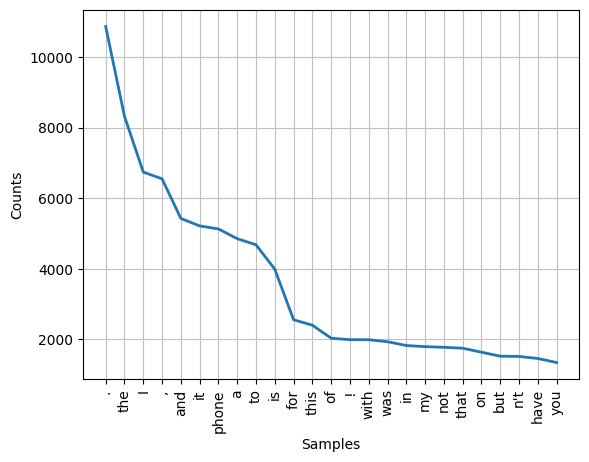

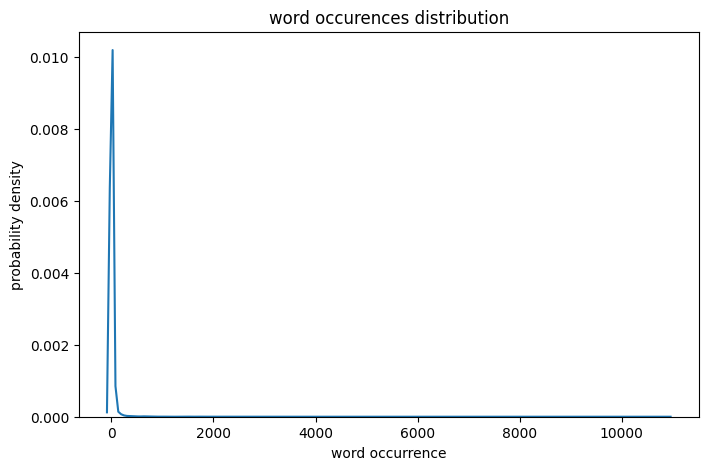

In [5]:
# Plot the distribution of words
from nltk import FreqDist

freqDist = FreqDist(flatten_reviews)
print(freqDist.most_common(20))
full_counts = [x[1] for x in freqDist.most_common()]
freqDist.plot(25, cumulative=False) # Plots the top 25 words and their occurences
pl.show()
pl.figure(figsize=(8,5))
#plot
sns.kdeplot(full_counts)
#labeling features for readibility you have to think about while presenting your results
pl.xlabel('word occurrence'); pl.ylabel('probability density'); pl.title('word occurences distribution')
pl.show()

# most of the time, the most common words are linking words, basic verbs, punctuation
# For instance, One can wonder either rare words are more significant for discriminative purposes.

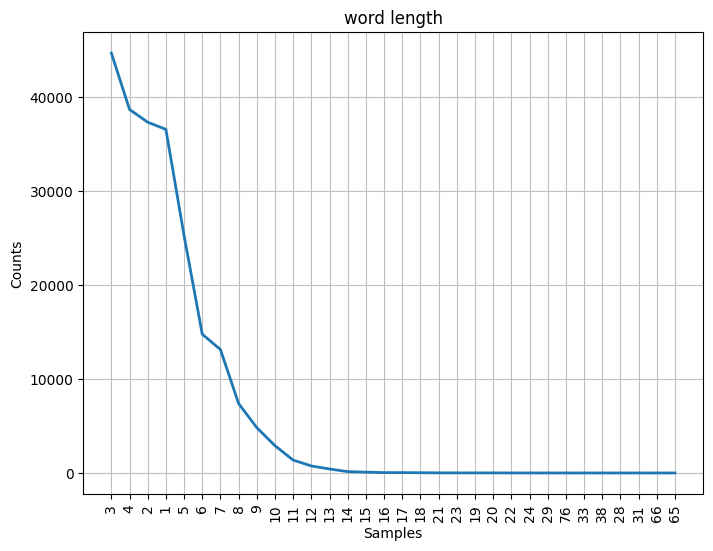

<AxesSubplot: title={'center': 'word length'}, xlabel='Samples', ylabel='Counts'>

In [6]:
# Plot the distibution of word length size
len_words = [len(w) for w in flatten_reviews]
freqDist2 = FreqDist(len_words)
pl.figure(figsize=(8,6))
pl.title('word length')
freqDist2.plot(cumulative=False)

Text(0.5, 1.0, 'sentence lengths distribution')

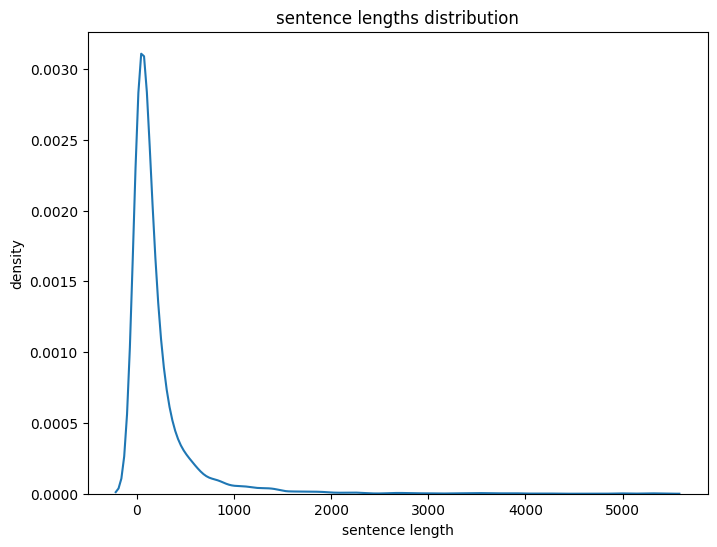

In [7]:
# Plot the distribution of sentence lengths
len_sentences = [len(s) for s in TRAIN["Reviews"]]
pl.figure(figsize=(8,6))
sns.kdeplot(len_sentences)
pl.xlabel('sentence length'); pl.ylabel('density');pl.title('sentence lengths distribution')

In [8]:
# On TRAIN only because we don't know future data

# Add a column to the dataframe with the length in tokens of the review
TRAIN['length'] = [len(r) for r in reviews_tokenized]

# What is the maximum length of a review
print("MAX:", TRAIN['length'].max())

# What is the average length of a review
print("MEAN:", TRAIN['length'].mean())

# What is the length of a review so that 90% of it is under
print("90%:", TRAIN['length'].quantile(q=0.9))

MAX: 1137
MEAN: 45.7284
90%: 109.0


In [9]:
# Put all reviews in lower case
lower_reviews = [r.lower() for r in TRAIN['Reviews']]
lower_reviews[:10]

['i love it!!! i absolutely love it!! 👌👍',
 'i love the blu phones! this is my second one this year and not because there is anything wrong with my blu studio 6.0 hd. i have just opted to "upgrade" to a phone with a slightly smaller screen and better battery life. for the price of these phones you cannot go wrong.1. setup is a breeze2. customization is easy3. colors are vibrant4. phone is light (even with a rugged case)5. battery life is better than any phone i have ever had6. screen is responsive to touch unlike some other phones.i have had no issue with volume or music playback as other reviewers have noted. all in all a great phone for a little price. everyone should give blu a try.',
 'great phone',
 'very happy with the performance. the apps worked flawlessly, camera could be better but no complaints considering it is only $50.',
 'easy to use great price',
 "came faster then expected, thanks cellathon. i've used androids and iphones, so this is the first time i used a windows pho

## Build X (features vectors) and y (labels)

In [10]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [11]:
# Construct X_val and y_val
X_val = VAL['Reviews'].fillna("")
y_val = VAL['Rating']
X_val.shape, y_val.shape

((1000,), (1000,))

In [12]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

## Our baseline
Using a binary `CountVectorizer` and a `LogisticRegression` classifier, build a first model.

For this model, you will not pre-process the text and will only use words (not N-grams). Leaves all parameter as default.

The evaluation metric is accuracy.

### Bow features

$$[TODO - Students]$$ 
Quickly remind what are CountVectorizer and LogisticRegression and how they work.

___
The goal of *CountVectorizer* is to take a collection of text an convert it to a matrix of token counts.

The *LogisticRegression* analyzes the relationship between one or more existing independent variables
___

In [13]:
# Encode X_train
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train) # adapt le vectorizer au jeu de donnée
X_train_encoded = cv.transform(X_train)
X_train_encoded.shape

(5000, 8991)

$$[TODO - Students]$$ 
Build and train a logistic regression model on this data using sklearn LogisticRegression

In [14]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(X_train_encoded, y_train)

c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(X_train_encoded, y_train)

c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Encode X_test
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape

(1000, 8991)

In [17]:
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_encoded)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64       159
           2       0.16      0.29      0.20        28
           3       0.15      0.21      0.18        52
           4       0.26      0.43      0.33        99
           5       0.90      0.76      0.82       662

    accuracy                           0.67      1000
   macro avg       0.42      0.47      0.44      1000
weighted avg       0.74      0.67      0.70      1000



### TF-IDF features

Now, we want to try a tf-idf vectorizer to encode our data.

$$[TODO - Students]$$ 
Quickly remind what are TfidfVectorizer how it works. Train a logistic regression on the data preprocessed with a TfidfVectorizer. 

___
*TfidfVectorizer* aims to compute the 'importance' of a term in a sentence. This 'importance' is inversely related to its frequency across the entirely sentence. (We can do a similar reasoning on sentences over a text or characters over a text).
___

In [18]:
# Encode X_train with TfidfVectorizer, similarly to CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
cv.fit(X_train) # adapt le vectorizer au jeu de donnée
X_train_encoded = cv.transform(X_train)
X_train_encoded.shape

(5000, 8991)

In [19]:
# Using LogisticRegression from sklearn, fit a model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(X_train_encoded, y_train)


c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Encode X_test
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape

(1000, 8991)

In [21]:
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_encoded)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.72      0.62      0.66       184
           2       0.00      0.00      0.00         2
           3       0.03      0.17      0.05        12
           4       0.17      0.42      0.24        66
           5       0.95      0.72      0.82       736

    accuracy                           0.67      1000
   macro avg       0.37      0.39      0.36      1000
weighted avg       0.84      0.67      0.74      1000



<AxesSubplot: >

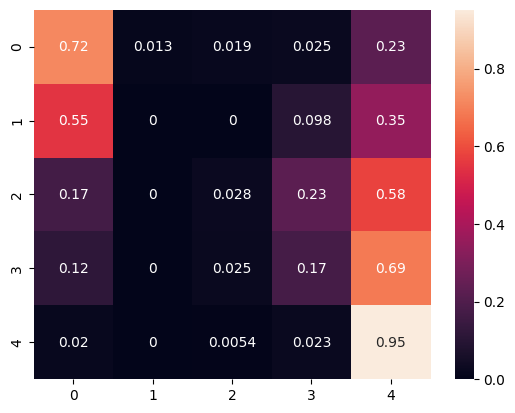

In [22]:
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),annot=True)

## Build an MLP Classifier


We now want to train a MLP to perform this task and compare it to the logistic regression baseline.
Once again, we also want to compare the performance when using BOW vs tf-idf.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

### BOW features

In [24]:
# Encode dataset with CountVectorizer (X) and 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

cv = CountVectorizer()
X_train_encoded = cv.fit_transform(X_train).toarray()
X_val_encoded = cv.transform(X_val).toarray()
X_test_encoded = cv.transform(X_test).toarray()

$$[TODO - Students]$$ 

Encode y_train, y_val and y_test using OneHotEncoder. What is the purpose of OneHotEncoding ?

___
*OneHotEncoder* takes a vector of variables in parameter and convert it to a binary matrix. 
Example :

Encode [a, b, a, c] -> [[1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1]]
___

In [25]:
# Define constant
num_classes = len(np.unique(y_train))

def encode(enc, arr):
  return enc.fit_transform(np.array(arr).reshape(-1, 1)).toarray()

feature_vector_length = X_train_encoded.shape[1]

enc = OneHotEncoder()
y_train_encoded = encode(enc, y_train)
y_test_encoded = encode(enc, y_test)
y_val_encoded = encode(enc, y_val)


$$[TODO - Students]$$ 

Build a simple network to predict the star rating of a review using the functional API. It should have the folowing characteristic : one hidden layer with 256 nodes and relu activation.



In [26]:
def build_model(inp_size, nb_classes, activation, last_activation, n_layers, hidden_dim) -> Model:
    input = Input(shape=(inp_size, ))

    for i in range(n_layers):
        if i==0:
            x = Dense(input_shape = (inp_size,), units=hidden_dim, activation=activation)(input)
        else:
            x = Dense(input_shape = (hidden_dim,), units=hidden_dim, activation=activation)(x)

    output = Dense(input_shape = (hidden_dim,), units=nb_classes, activation=last_activation)(x)
    model = Model(input, output, name = 'model'+activation)
    return model
model = build_model(feature_vector_length, num_classes, "relu", "softmax", 1, 256)
model.summary()

Model: "modelrelu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8991)]            0         
                                                                 
 dense (Dense)               (None, 256)               2301952   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2,303,237
Trainable params: 2,303,237
Non-trainable params: 0
_________________________________________________________________


$$[TODO - Students]$$ 

We are now training the model. Using the tensorflow documentation, explain the purpose the EarlyStopping callback and detail its arguments.

Complete the following code with the appropriate loss and explain what it does. Briefly explain the epochs and batchsize parameters

___
*EarlyStopping* makes the learning phase to stop if one of its parameter has not improved from one epoch to the other 
___

In [27]:
# Configure the model and start training
# Stop training with early stopping with patience of 20
callbacks_list = [
  EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0.0005, 
    patience=20, 
    verbose=1, 
    mode='max', 
    restore_best_weights=True)
    ]

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_encoded, y_train_encoded, validation_data=(X_val_encoded, y_val_encoded),
                    epochs=1000, batch_size=250, callbacks=callbacks_list, verbose=1)

Epoch 1/1000
20/20 [==============================] - 2s 52ms/step - loss: 1.4349 - accuracy: 0.5722 - val_loss: 1.2530 - val_accuracy: 0.6410
Epoch 2/1000
20/20 [==============================] - 1s 33ms/step - loss: 1.0074 - accuracy: 0.6974 - val_loss: 1.0180 - val_accuracy: 0.6670
Epoch 3/1000
20/20 [==============================] - 1s 35ms/step - loss: 0.7472 - accuracy: 0.7618 - val_loss: 0.9134 - val_accuracy: 0.6810
Epoch 4/1000
20/20 [==============================] - 1s 33ms/step - loss: 0.5834 - accuracy: 0.8166 - val_loss: 0.8867 - val_accuracy: 0.6820
Epoch 5/1000
20/20 [==============================] - 1s 33ms/step - loss: 0.4748 - accuracy: 0.8502 - val_loss: 0.8905 - val_accuracy: 0.6890
Epoch 6/1000
20/20 [==============================] - 1s 35ms/step - loss: 0.3977 - accuracy: 0.8774 - val_loss: 0.9158 - val_accuracy: 0.6910
Epoch 7/1000
20/20 [==============================] - 1s 42ms/step - loss: 0.3394 - accuracy: 0.8986 - val_loss: 0.9427 - val_accuracy: 0.6850

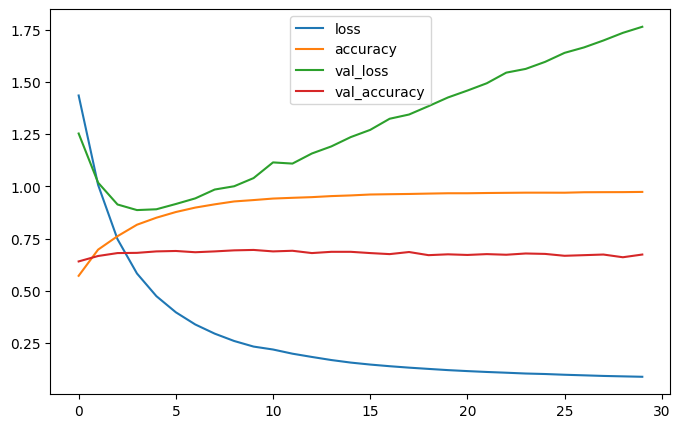

In [28]:
# Plot the learning curves and analyze them
pd.DataFrame(history.history).plot(figsize=(8,5))
pl.show()

$$[TODO - Students]$$ 

How do you interpret those learning curves ?


___
The model is overfitting since from a certain moment, betwenn 0 and 5 epochs, the val_loss and the loss courves do not converge 
___

The model is seemingly overfitting the train data. Various strategies could reduce the overfitting but for this lab, we'll settle on changing the layers number and size

In [29]:
# Evaluate the model
y_pred_encoded = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_encoded,axis=1) + 1

print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           1       0.66      0.70      0.68       159
           2       0.37      0.22      0.27        51
           3       0.29      0.14      0.19        71
           4       0.41      0.26      0.32       163
           5       0.76      0.90      0.83       556

    accuracy                           0.68      1000
   macro avg       0.50      0.44      0.46      1000
weighted avg       0.63      0.68      0.65      1000



<AxesSubplot: >

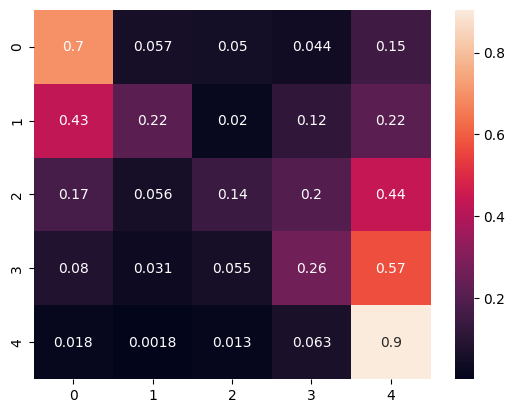

In [30]:
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),annot=True)

### TF-IDF features

In [44]:
# Encode X_train with TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
X_train_encoded = tfidf.fit_transform(X_train).toarray()
X_val_encoded = tfidf.transform(X_val).toarray()
X_test_encoded = tfidf.transform(X_test).toarray()


$$[TODO - Students]$$ 

Build and train the same model as previously on this new encoding

In [87]:
def build_model(inp_size, nb_classes, activation, n_layers, hidden_dim) -> Model:
    input = Input(shape=(inp_size, ))

    for i in range(n_layers):
        if i == 0:
            x = Dense(input_shape=(inp_size,), units=hidden_dim,
                      activation=activation)(input)
        else:
            x = Dense(input_shape=(hidden_dim,),
                      units=hidden_dim, activation=activation)(x)

    output = Dense(input_shape=(hidden_dim,),
                   units=nb_classes, activation="softmax")(x)
    model = Model(input, output, name='model_relu')
    return model

def compile_model(model, X_train, y_train, X_val, y_val, epoch=1000):
    callbacks_list = [
        EarlyStopping(
            monitor='val_accuracy',
            min_delta=0.0005,
            patience=20,
            verbose=1,
            mode='max',
            restore_best_weights=True)
    ]

    model.compile(loss="categorical_crossentropy",
                  optimizer='adam', metrics=['accuracy'])

    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=epoch,
        batch_size=250,
        callbacks=callbacks_list,
        verbose=1
    )
    return history

In [86]:
# model tdidf building and training


num_classes = len(np.unique(y_train))
feature_vector_length = X_train_encoded.shape[1]

model = build_model(feature_vector_length, num_classes, "relu", 1, 256)
history = compile_model(model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


Epoch 1/1000
20/20 [==============================] - 2s 50ms/step - loss: 1.4809 - accuracy: 0.5236 - val_loss: 1.3311 - val_accuracy: 0.5590
Epoch 2/1000
20/20 [==============================] - 1s 31ms/step - loss: 1.2217 - accuracy: 0.5444 - val_loss: 1.1394 - val_accuracy: 0.5830
Epoch 3/1000
20/20 [==============================] - 1s 28ms/step - loss: 1.0147 - accuracy: 0.6414 - val_loss: 1.0022 - val_accuracy: 0.6560
Epoch 4/1000
20/20 [==============================] - 1s 28ms/step - loss: 0.8517 - accuracy: 0.6908 - val_loss: 0.9211 - val_accuracy: 0.6760
Epoch 5/1000
20/20 [==============================] - 1s 36ms/step - loss: 0.7224 - accuracy: 0.7420 - val_loss: 0.8741 - val_accuracy: 0.6960
Epoch 6/1000
20/20 [==============================] - 1s 32ms/step - loss: 0.6142 - accuracy: 0.8006 - val_loss: 0.8540 - val_accuracy: 0.6970
Epoch 7/1000
20/20 [==============================] - 1s 33ms/step - loss: 0.5202 - accuracy: 0.8498 - val_loss: 0.8426 - val_accuracy: 0.6890

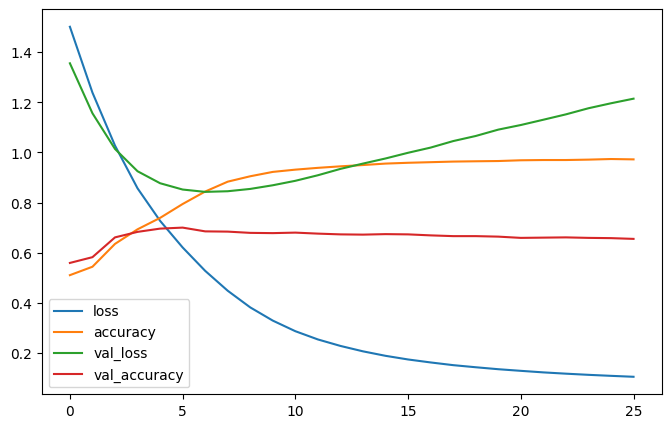

In [46]:
# Plot the learning curves and analyze them
pd.DataFrame(history.history).plot(figsize=(8,5))
pl.show()

In [47]:
# Evaluate the model
y_pred_encoded = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_encoded,axis=1) + 1

print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           1       0.64      0.82      0.72       159
           2       1.00      0.06      0.11        51
           3       0.33      0.01      0.03        71
           4       0.42      0.19      0.26       163
           5       0.74      0.95      0.83       556

    accuracy                           0.69      1000
   macro avg       0.63      0.41      0.39      1000
weighted avg       0.66      0.69      0.63      1000



<AxesSubplot: >

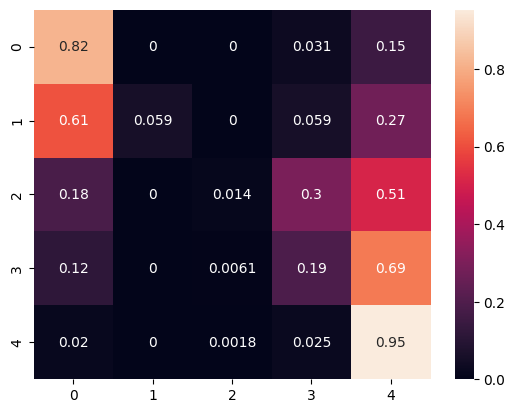

In [48]:
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),annot=True)

$$[TODO - Students]$$ 

Compare the MLP models to the logistic regression baseline. Compare the BOW encoding to tf-idf encoding. 
In this case, which performs better ?

MLP models are more precise then the linear regression baseline.
TF-IDF seems to performs better than the bow encoding strategy.

## Architecture exploration

One way to improve the performance of our MLP is to explore the architecture lay yielding the best results. We could also fiddle with other hyperparameters as we'll see in future classes, but for this lab, we'll settle with exploring the optimal number of layers and hidden size of our MLP

$$[TODO - Students]$$ 

Improve the model by changing the number of layers and the number of neurons per layer

In [144]:
model = build_model(feature_vector_length, num_classes, "relu", 2, 200)
history = compile_model(model, X_train_encoded, y_train_encoded, X_val_encoded, y_val_encoded)


Epoch 1/1000
20/20 [==============================] - 1s 47ms/step - loss: 1.4431 - accuracy: 0.5260 - val_loss: 1.2363 - val_accuracy: 0.5590
Epoch 2/1000
20/20 [==============================] - 1s 33ms/step - loss: 1.1110 - accuracy: 0.5466 - val_loss: 1.0080 - val_accuracy: 0.6140
Epoch 3/1000
20/20 [==============================] - 1s 40ms/step - loss: 0.8801 - accuracy: 0.6662 - val_loss: 0.8890 - val_accuracy: 0.6830
Epoch 4/1000
20/20 [==============================] - 1s 29ms/step - loss: 0.6849 - accuracy: 0.7282 - val_loss: 0.8394 - val_accuracy: 0.6990
Epoch 5/1000
20/20 [==============================] - 1s 28ms/step - loss: 0.5178 - accuracy: 0.8214 - val_loss: 0.8556 - val_accuracy: 0.6860
Epoch 6/1000
20/20 [==============================] - 1s 27ms/step - loss: 0.3684 - accuracy: 0.9032 - val_loss: 0.9287 - val_accuracy: 0.6790
Epoch 7/1000
20/20 [==============================] - 1s 27ms/step - loss: 0.2575 - accuracy: 0.9396 - val_loss: 1.0343 - val_accuracy: 0.6830

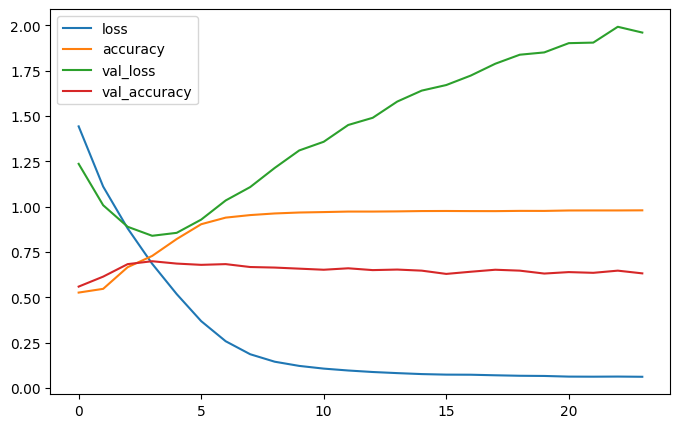

In [145]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pl.show()


In [146]:
y_pred_encoded = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_encoded, axis=1) + 1

print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           1       0.59      0.82      0.69       159
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        71
           4       0.45      0.17      0.24       163
           5       0.74      0.95      0.83       556

    accuracy                           0.69      1000
   macro avg       0.36      0.39      0.35      1000
weighted avg       0.58      0.69      0.61      1000



c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DavideF\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av